In [10]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
X_train=pd.read_csv('X_train.csv')

Y_train=pd.read_csv('Y_train.csv')

X_test=pd.read_csv('X_test.csv')

Y_test=pd.read_csv('Y_test.csv')

X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])


le=LabelEncoder()
for col in X_test.columns.values:
    if X_test[col].dtypes=='object':
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

In [25]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,13,1,0,0,0,0,4950,0.0,125,360,1,2
1,193,1,1,1,0,0,2882,1843.0,123,480,1,1
2,461,1,1,0,0,0,3000,3416.0,56,180,1,1
3,191,1,1,2,0,0,9703,0.0,112,360,1,2
4,300,1,1,0,0,0,2333,2417.0,136,360,1,2
5,202,1,1,3,0,0,5250,0.0,94,360,1,2
6,365,1,1,0,0,0,4333,2451.0,110,360,1,2


In [16]:

X=X_train.iloc[:,0:20]
Y=Y_train.iloc[:,-1]

In [17]:
bestfeature=SelectKBest(score_func=chi2,k=10)
fit=bestfeature.fit(X,Y)

In [18]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [19]:
featureScore=pd.concat([dfcolumns,dfscores],axis=1)
featureScore.columns=['Specs','Score']
featureScore

,Specs,Score
0,Loan_ID,1.310373
1,Gender,0.317368
2,Married,1.413852
3,Dependents,0.291568
4,Education,0.440048
5,Self_Employed,0.109743
6,ApplicantIncome,5360.353413
7,CoapplicantIncome,10423.334953
8,LoanAmount,58.260599
9,Loan_Amount_Term,1.829486


In [20]:
print(featureScore.nlargest(10,'Score'))

                Specs         Score
7   CoapplicantIncome  10423.334953
6     ApplicantIncome   5360.353413
8          LoanAmount     58.260599
10     Credit_History     16.735561
9    Loan_Amount_Term      1.829486
2             Married      1.413852
0             Loan_ID      1.310373
4           Education      0.440048
11      Property_Area      0.372020
1              Gender      0.317368


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)

C:\Users\TML\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [22]:
print(model.feature_importances_)

[0.12524965 0.01818134 0.02063469 0.06194342 0.02254293 0.01993013
 0.13694486 0.08370669 0.12511346 0.06019158 0.26419429 0.06136694]


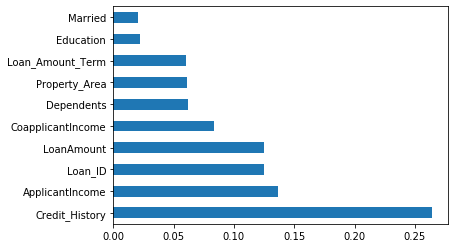

In [23]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()